## import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings

## view and discover data

In [5]:
df = pd.read_csv(r"G:\My Drive\projects\machine learning\egypt house price pridection\Egypt_Houses_Price.csv")
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [6]:
print(df.shape)
df.info()

(27361, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [7]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27361 non-null  object 
 1   Price           27322 non-null  float64
 2   Bedrooms        27121 non-null  float64
 3   Bathrooms       27153 non-null  float64
 4   Area            26854 non-null  float64
 5   Furnished       27361 non-null  object 
 6   Level           27361 non-null  object 
 7   Compound        27361 non-null  object 
 8   Payment_Option  27361 non-null  object 
 9   Delivery_Date   27361 non-null  object 
 10  Delivery_Term   27361 non-null  object 
 11  City            27361 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.5+ MB


In [8]:
# Columns to check value counts for
columns = ['Type', 'Level', 'Compound','City']

# Print value counts for each column
for col in columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for Type:
Type
Apartment            8506
Chalet               6593
Stand Alone Villa    4629
Town House           3074
Twin House           1795
Duplex                861
Standalone Villa      608
Penthouse             526
Twin house            483
Studio                250
Unknown                36
Name: count, dtype: int64

Value counts for Level:
Level
Unknown    10439
Ground      4821
2           3727
1           3592
3           2097
4            898
5            577
10+          257
6            223
7            216
Highest      178
8            129
10           104
9            103
Name: count, dtype: int64

Value counts for Compound:
Compound
Unknown                      11068
Madinaty                      1310
Mountain View North Coast      839
Hyde Park New Cairo            506
Rehab City                     425
                             ...  
La Jolie                         1
Al Maamourah El Gadida           1
Hacienda Village                 1
Tiba Rose    

In [9]:
df.describe()

,Price,Bedrooms,Bathrooms,Area
count,2.732200e+04,27121.000000,27153.000000,26854.000000
mean,4.761822e+06,3.241805,2.811181,229.320610
std,6.766653e+06,1.211612,1.353765,161.048628
min,3.000000e+04,1.000000,1.000000,10.000000
25%,1.150000e+06,3.000000,2.000000,125.000000
50%,2.731000e+06,3.000000,3.000000,175.000000
75%,5.989000e+06,4.000000,3.000000,275.000000
max,2.400000e+08,10.000000,10.000000,998.000000


## data cleaning

In [11]:
# Filter the DataFrame to exclude rows where the 'Type' column has the value 'Unknown'
df = df[df['Type'] != 'Unknown']

# Display the count of each unique value in the 'Type' column after filtering
df['Type'].value_counts()


Type
Apartment            8506
Chalet               6593
Stand Alone Villa    4629
Town House           3074
Twin House           1795
Duplex                861
Standalone Villa      608
Penthouse             526
Twin house            483
Studio                250
Name: count, dtype: int64

In [12]:
# Calculate the relative distribution of values excluding "Unknown"
value_counts = df[df['Level'] != 'Unknown']['Level'].value_counts(normalize=True)

# Get the count of "Unknown" values
unknown_count = df['Level'].value_counts().get('Unknown', 0)

# Generate a random list of replacement values based on the distribution
replacement_values = np.random.choice(value_counts.index, size=unknown_count, p=value_counts.values)

# Replace "Unknown" values with the generated random values
df.loc[df['Level'] == 'Unknown', 'Level'] = replacement_values


df['Level'].value_counts()


Level
Ground     7792
2          6029
1          5808
3          3379
4          1408
5           931
10+         410
7           365
6           361
Highest     272
8           227
10          183
9           160
Name: count, dtype: int64

In [13]:
df.isnull().sum()

Type                0
Price               3
Bedrooms          204
Bathrooms         172
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [16]:
df = df.drop(columns=['Furnished','Payment_Option','Delivery_Date','Delivery_Term'])

In [17]:
# Calculate the total number of occurrences of 'Unknown' in the entire DataFrame
unknown_count = (df == 'Unknown').sum().sum()

# Print the result, showing the total count of 'Unknown' values across all columns
print("Total number of 'Unknown' values in the entire DataFrame:", unknown_count)



Total number of 'Unknown' values in the entire DataFrame: 10697


In [18]:
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [19]:
# Replace duplicate values
df = df.replace({
    'Stand Alone Villa': 'Standalone Villa',
    'Twin house': 'Twin House'
})
df['Type'].head()

0       Duplex
1    Apartment
2    Apartment
3    Apartment
4    Apartment
Name: Type, dtype: object

In [20]:
# Check for duplicates and display them if found
if df.duplicated().any():
    print("Duplicate rows found:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found.")




Duplicate rows found:
                   Type       Price  Bedrooms  Bathrooms   Area   Level  \
322           Apartment    330000.0       2.0        2.0  135.0       8   
356           Apartment   1680000.0       3.0        2.0  116.0       1   
422           Apartment   1478000.0       3.0        2.0  120.0       7   
443           Apartment    280000.0       2.0        2.0  138.0       2   
449           Apartment    300000.0       3.0        2.0  167.0       1   
...                 ...         ...       ...        ...    ...     ...   
27296  Standalone Villa  12000000.0       7.0        6.0  760.0  Ground   
27313        Town House   4400000.0       3.0        3.0  164.0  Ground   
27331        Town House   4900000.0       3.0        3.0  170.0  Ground   
27335  Standalone Villa   4500000.0       4.0        3.0  300.0  Ground   
27337  Standalone Villa  10000000.0       3.0        3.0  267.0       2   

       Compound              City  
322     Unknown             Haram  
356  

In [21]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify the result
print("Duplicates removed. Current number of rows:", len(df))


Duplicates removed. Current number of rows: 24268


In [22]:
print(df.shape)
df.head()

(24268, 8)


,Type,Price,Bedrooms,Bathrooms,Area,Level,Compound,City
0,Duplex,4000000.0,3.0,3.0,400.0,7,Unknown,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,10+,Unknown,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,1,Unknown,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,10,Unknown,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,Ground,Eastown,New Cairo - El Tagamoa


## Exploratory data analysis(EDA)

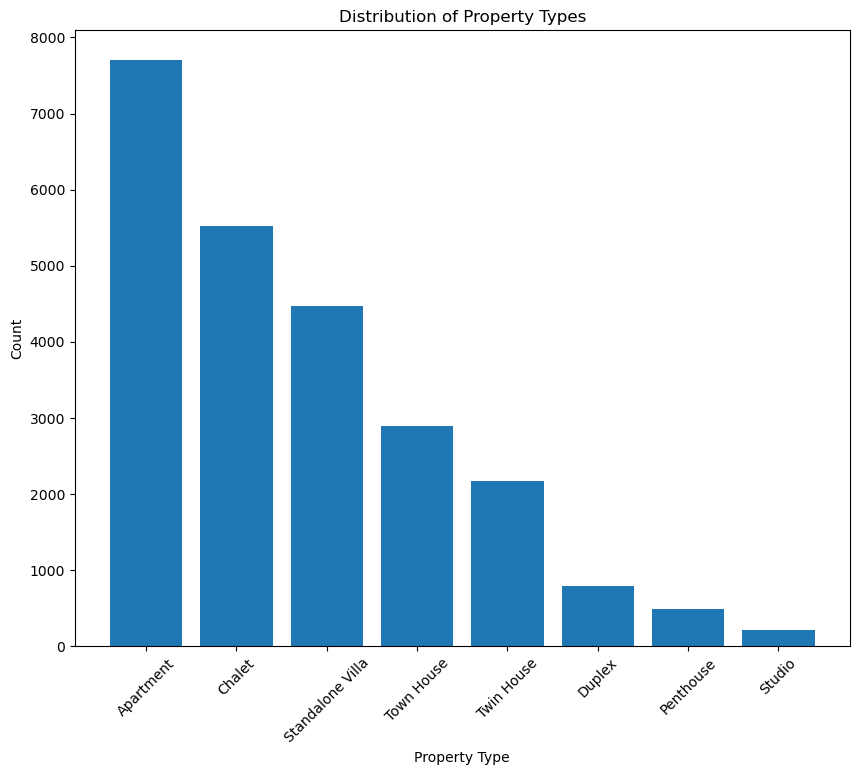

In [24]:
plt.figure(figsize=(10,8))
plt.bar(df['Type'].value_counts().index,df['Type'].value_counts().values)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

C:\Users\mylap\AppData\Local\Temp\ipykernel_28544\1381584184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Type',y='Price', palette='Pastel1')


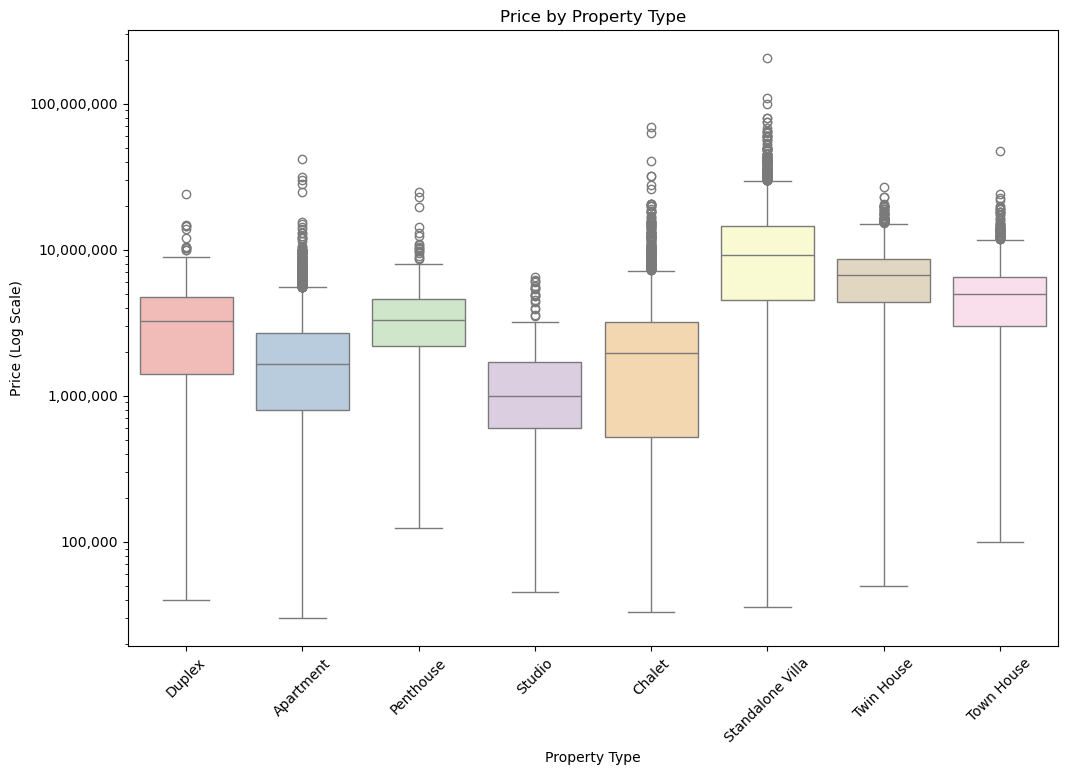

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Type',y='Price', palette='Pastel1')
# Use logarithmic scale for y-axis
plt.yscale('log')
# Set y-axis ticks to specific values for readability
y_ticks = [1e5, 1e6, 1e7, 1e8]  
plt.yticks(y_ticks, [f'{int(y):,}' for y in y_ticks])
plt.title('Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (Log Scale)')
plt.xticks(rotation=45)
plt.show()

In [26]:
# اختيار العمود الذي تريد إزالة القيم الشاذة منه
column = 'Price'  # يمكن تغييره إلى أي عمود آخر

# حساب الربع الأول والربع الثالث والـ IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# تحديد القيم غير الشاذة باستخدام حدود IQR
df = df[(df['Price'] >= Q1 - 3 * IQR) & (df[column] <= Q3 + 3 * IQR)]


In [27]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Level,Compound,City
0,Duplex,4000000.0,3.0,3.0,400.0,7,Unknown,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,10+,Unknown,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,1,Unknown,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,10,Unknown,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,Ground,Eastown,New Cairo - El Tagamoa


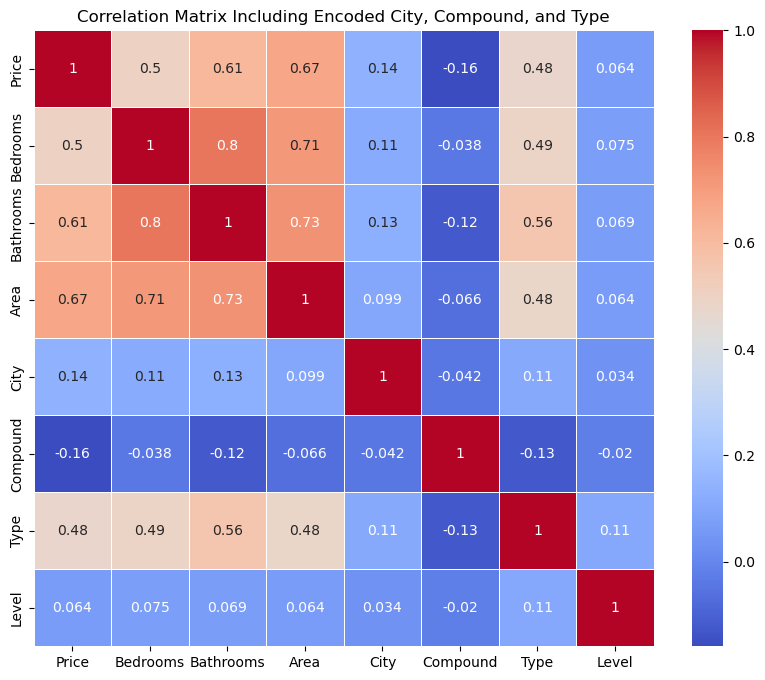

In [28]:

from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in ['City', 'Compound', 'Type','Level']:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Generate the correlation matrix with the encoded categorical columns
correlation_matrix = df_encoded[['Price', 'Bedrooms', 'Bathrooms', 'Area', 'City', 'Compound', 'Type','Level']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Encoded City, Compound, and Type')
plt.show()


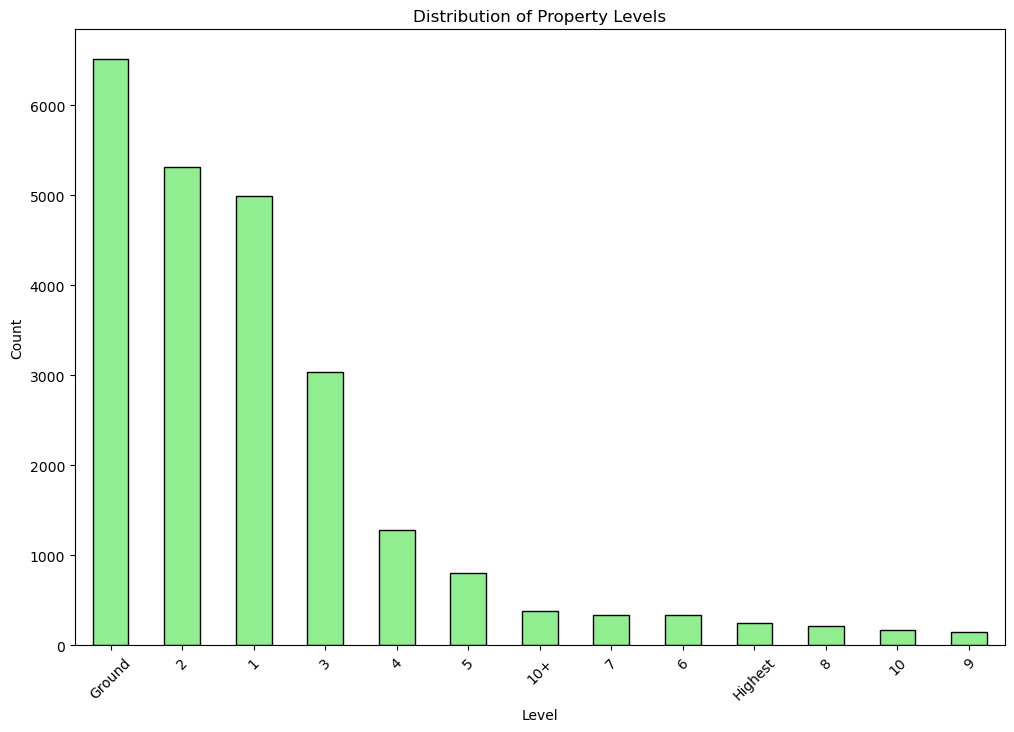

In [29]:
plt.figure(figsize=(12,8))
df['Level'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Property Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## معامل التضخم أخر سنتين=(1+0.254)×(1+0.419)≈1.79

In [31]:

# Define the inflation factor and apply it to the Price column
inflation_factor = 1.79
df['Price'] = df['Price'] * inflation_factor  # Adjust prices for inflation

# Label Encoding for categorical variables
label_encoders = {}  # Dictionary to store encoders for each feature
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future use (e.g., decoding)

# Separate features and target
X = df.drop(columns=['Price'])
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred = np.maximum(y_pred, 0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest Regressor")

# 2. Gradient Boosting Regressor (XGBoost)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, "XGBoost Regressor")

# 3. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
evaluate_model(ridge_model, X_test, y_test, "Ridge Regression")


Random Forest Regressor - RMSE: 4093607.44, R²: 0.69
XGBoost Regressor - RMSE: 4045900.14, R²: 0.69
Ridge Regression - RMSE: 5040340.22, R²: 0.52


In [32]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Level,Compound,City
0,2,7160000.0,3.0,3.0,400.0,8,518,115
1,0,7160000.0,3.0,3.0,160.0,2,518,41
2,0,4027500.0,3.0,2.0,165.0,0,518,161
3,0,3401000.0,3.0,2.0,230.0,1,518,115
4,0,10382000.0,2.0,3.0,160.0,11,138,117


In [33]:
import joblib

# افترض أن xgb_model هو النموذج المدرب
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']